# 셀프주유소는 정말 저렴할까
### -오피넷 검색

In [40]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

### -서울시 구별 주유소 가격 정보 얻기

In [41]:
driver = webdriver.Chrome()
driver.get('https://www.opinet.co.kr/user/main/mainView.do')

In [42]:
#싼 주유소 찾기 화면
driver.find_element_by_css_selector('.m1').click()

In [28]:
#서울 자치구 리스트 가져오기
region = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = region.find_elements_by_css_selector('option')
gu_names = [gu.text for gu in gu_list]
del gu_names[0]
gu_names

['강남구',
 '강동구',
 '강북구',
 '강서구',
 '관악구',
 '광진구',
 '구로구',
 '금천구',
 '노원구',
 '도봉구',
 '동대문구',
 '동작구',
 '마포구',
 '서대문구',
 '서초구',
 '성동구',
 '성북구',
 '송파구',
 '양천구',
 '영등포구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구']

In [ ]:
#//*[@id="SIGUNGU_NM0"]

In [34]:
#자치구 리스트 가져오는 방법2
gu = gu_names[0]
region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
region.send_keys(gu)

In [35]:
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [36]:
for gu in gu_names:
    region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
    region.send_keys(gu)
    time.sleep(1)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep

In [45]:
driver.close()

### 구별 휘발유 가격에 대한 데이터 정리

In [47]:
import pandas as pd
from glob import glob

In [48]:
glob('/Users/CPB06GameN/Downloads/지역*.xls')

['/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (1).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (10).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (11).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (12).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (13).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (14).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (15).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (16).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (17).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (18).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (19).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (2).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (20).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (21).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (22).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (23).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (3).xls',
 '/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (4).xls',
 '/Users/CPB06GameN/Downloads\\지

In [50]:

file = glob('/Users/CPB06GameN/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),SK에너지,02-445-6870,Y,-,1585,1385,-
1,서울특별시,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),SK에너지,02-3462-5100,Y,1761,1593,1389,-
2,서울특별시,방죽주유소,서울 강남구 밤고개로 215 (율현동),GS칼텍스,02-459-3434,Y,-,1597,1399,-
3,서울특별시,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,GS칼텍스,02-2226-4963,Y,-,1600,1400,-
4,서울특별시,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),현대오일뱅크,02-529-5101,Y,1771,1603,1399,-


In [51]:
#모든 파일을 읽어서 하나의 데이터 프레임으로 만듦
raw = []
for file in glob('/Users/CPB06GameN/Downloads/지역*.xls'):
    df = pd.read_excel(file, header=2)
    raw.append(df)

station_raw= pd.concat(raw)

In [52]:
station_raw.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
35,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2299,2113,1859,1359
36,서울특별시,뉴서울(강남),서울 강남구 언주로 716,SK에너지,02-518-5631,N,2470,2195,1975,-
37,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-
38,서울특별시,역삼주유소,서울 강남구 역삼로 205,GS칼텍스,02-557-5189,N,-,-,-,-
39,서울특별시,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),SK에너지,02-542-6726,N,-,-,-,-


In [53]:
stations = pd.DataFrame({
    '상호':station_raw.상호,
    '주소':station_raw.주소,
    '가격':station_raw.휘발유,
    '셀프':station_raw.셀프여부,
    '상표':station_raw.상표,
})
stations.head()

,상호,주소,가격,셀프,상표
0,(주)보성 세곡주유소,서울 강남구 헌릉로 731 (세곡동),1585,Y,SK에너지
1,오일프러스 셀프,서울 강남구 남부순환로 2651 (도곡동),1593,Y,SK에너지
2,방죽주유소,서울 강남구 밤고개로 215 (율현동),1597,Y,GS칼텍스
3,지에스칼텍스(주)직영 산성주유소,서울 강남구 헌릉로 730,1600,Y,GS칼텍스
4,현대오일뱅크 도곡셀프주유소,서울 강남구 남부순환로 2718 (도곡2동),1603,Y,현대오일뱅크


In [56]:
stations['구'] = [addr.split()[1] for addr in station_raw.주소]
stations.tail()

,상호,주소,가격,셀프,상표,구
35,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113,N,GS칼텍스,강남구
36,뉴서울(강남),서울 강남구 언주로 716,2195,N,SK에너지,강남구
37,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
38,역삼주유소,서울 강남구 역삼로 205,-,N,GS칼텍스,강남구
39,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [58]:
stations['구'].unique()

array(['강남구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구',
       '영등포구', '용산구', '강서구', '은평구', '종로구', '중구', '중랑구', '관악구', '광진구',
       '구로구', '금천구', '노원구', '도봉구', '동대문구'], dtype=object)

In [62]:
stations = stations[stations['가격'] != '-']
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 36
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      482 non-null    object
 1   주소      482 non-null    object
 2   가격      482 non-null    object
 3   셀프      482 non-null    object
 4   상표      482 non-null    object
 5   구       482 non-null    object
dtypes: object(6)
memory usage: 26.4+ KB


In [67]:
stations['가격'] = pd.to_numeric(stations['가격'])
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 36
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      482 non-null    object
 1   주소      482 non-null    object
 2   가격      482 non-null    int64 
 3   셀프      482 non-null    object
 4   상표      482 non-null    object
 5   구       482 non-null    object
dtypes: int64(1), object(5)
memory usage: 26.4+ KB
<ipython-input-67-9ef1b9b42b77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stations['가격'] = pd.to_numeric(stations['가격'])


### - 셀프 주유소가 정말 저렴한지 확인하기

In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
plt.rcParams["font.family"] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus']= False

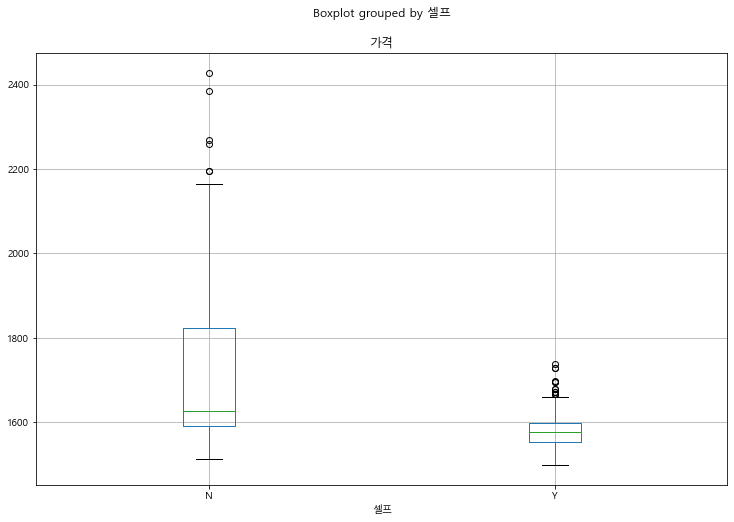

In [72]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

<function matplotlib.pyplot.show(close=None, block=None)>

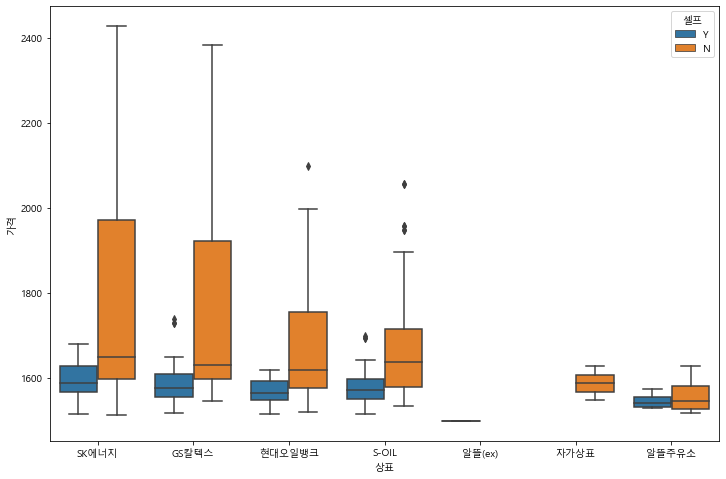

In [74]:
# 상표별로 확인
plt.figure(figsize = (12,8))
sns.boxplot(x='상표', y='가격', hue = '셀프', data = stations)
plt.show

### -서울시 구별 휘발유 가격 확인

In [77]:
import json
import folium
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [79]:
#가격이 비싼 주유소 top5
stations.sort_values(by='가격',ascending = False).head(5)

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2428,N,SK에너지,중구
12,서계주유소,서울 용산구 청파로 367 (서계동),2384,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2269,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2259,N,SK에너지,중구
36,뉴서울(강남),서울 강남구 언주로 716,2195,N,SK에너지,강남구


In [80]:
#가격이 저렴한 주유소 top5
stations.sort_values(by='가격').head(5)

,상호,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1498,Y,알뜰(ex),서초구
0,가로공원주유소,서울 양천구 가로공원로 165 (신월동),1514,N,SK에너지,양천구
1,개나리Self주유소,서울 양천구 남부순환로 442 (신월동),1515,Y,SK에너지,양천구
0,영등포제일셀프주유소,서울 영등포구 가마산로 379,1515,Y,현대오일뱅크,영등포구
2,현대주유소,서울 양천구 남부순환로 372 (신월동),1515,Y,S-OIL,양천구


In [84]:
gu_data = stations.groupby('구')['가격'].mean()
gu_data

구
강남구     1784.486486
강서구     1593.242424
관악구     1619.312500
광진구     1596.214286
구로구     1603.318182
금천구     1566.833333
노원구     1613.000000
도봉구     1549.722222
동대문구    1597.650000
동작구     1602.900000
마포구     1676.416667
서대문구    1569.266667
서초구     1658.314286
성동구     1671.823529
성북구     1562.416667
송파구     1609.593750
양천구     1585.500000
영등포구    1650.555556
용산구     2020.230769
은평구     1570.312500
종로구     1883.000000
중구      2036.400000
중랑구     1560.461538
Name: 가격, dtype: float64

In [85]:
gu_data = stations.groupby('구')[['가격']].mean()
gu_data
#데이터 프레임

,가격
구,
강남구,1784.486486
강서구,1593.242424
관악구,1619.312500
광진구,1596.214286
구로구,1603.318182
금천구,1566.833333
노원구,1613.000000
도봉구,1549.722222
동대문구,1597.650000


In [93]:
geo_path = '../04.지도공공API/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='UTF-8'))

In [94]:
map = folium.Map(
        location=[37.5502, 126.982], 
        zoom_start=11, tiles='Stamen Toner'
)
map.choropleth(
    geo_data = geo_data,
    data = gu_data.가격,
    columns = [gu_data.index, gu_data.가격],
    fill_color = 'PuRd',
    key_on = 'feature.id'
)
map